In [ ]:
!pip install xgboost

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [ ]:
# Load dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  #Labels (0 = malignant, 1 = benign)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
# 1. Decision Tree
print("Decision Tree:")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test)

Decision Tree:
Accuracy: 0.95
ROC AUC: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
# 2. Random Forest
print("Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

Random Forest:
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
# 3. XGBoost
print("XGBoost:")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)

XGBoost:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:41:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.97
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
# 4. K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test)

K-Nearest Neighbors (KNN):
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# **ROC Curve Beafore Feature selection**

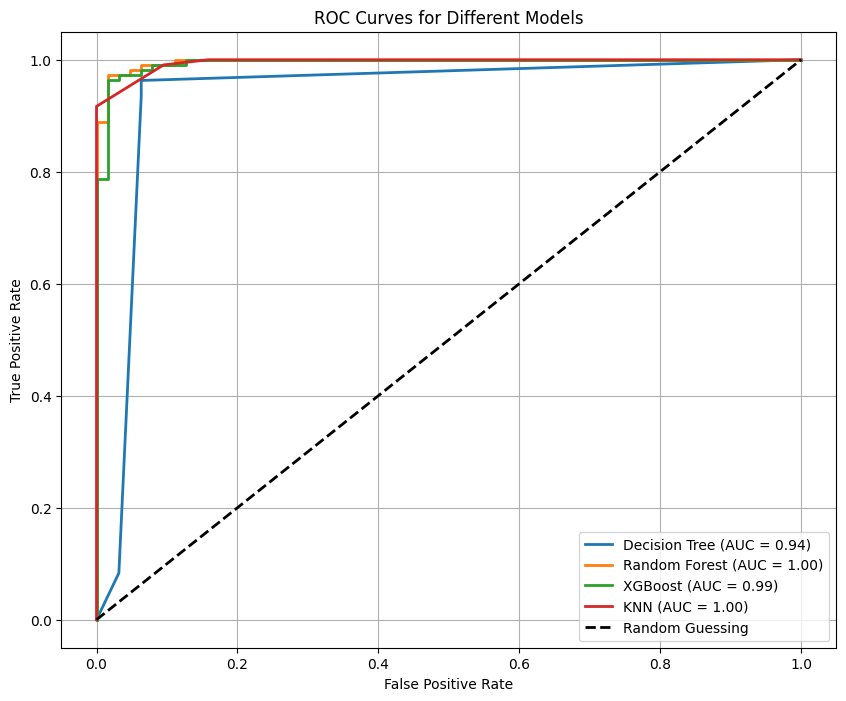

In [ ]:
models = [dt_model, rf_model, xgb_model, knn_model]
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'KNN']

plt.figure(figsize=(10, 8))

for i, model in enumerate(models):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Using GridSearchCV

## 1. Import Libraries

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## 2. Load Dataset

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Define the Model and Parameter Grid

In [ ]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

## 4. Perform Grid Search

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to evaluate
    cv=5,               # Number of cross-validation folds
    verbose=1,          # Print progress
    n_jobs=-1           # Use all available CPU cores
)


# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

## 5. Evaluate the Best Model

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# 4. Feature Importance:

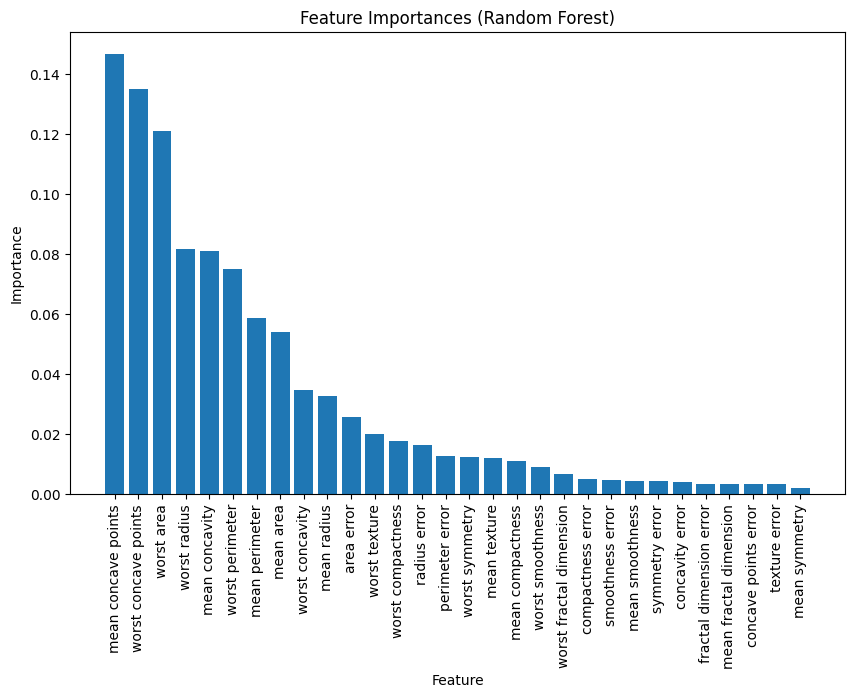

In [ ]:
# Plot feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = data.feature_names
indices = np.argsort(importances)[::-1] #sorting the features based on their importance
# np.argsort(importances) gives the indices (positions) of the feature importances in ascending order.
# [::-1] reverses the order, resulting in the indices of the features sorted by importance in descending order (most important to least important)
# indices is a variable assigned to this sorted list of indices."


plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


# **Compare the feature importance of Decision Trees, Random Forests, and XGBoost. Are the top features consistent across models?**

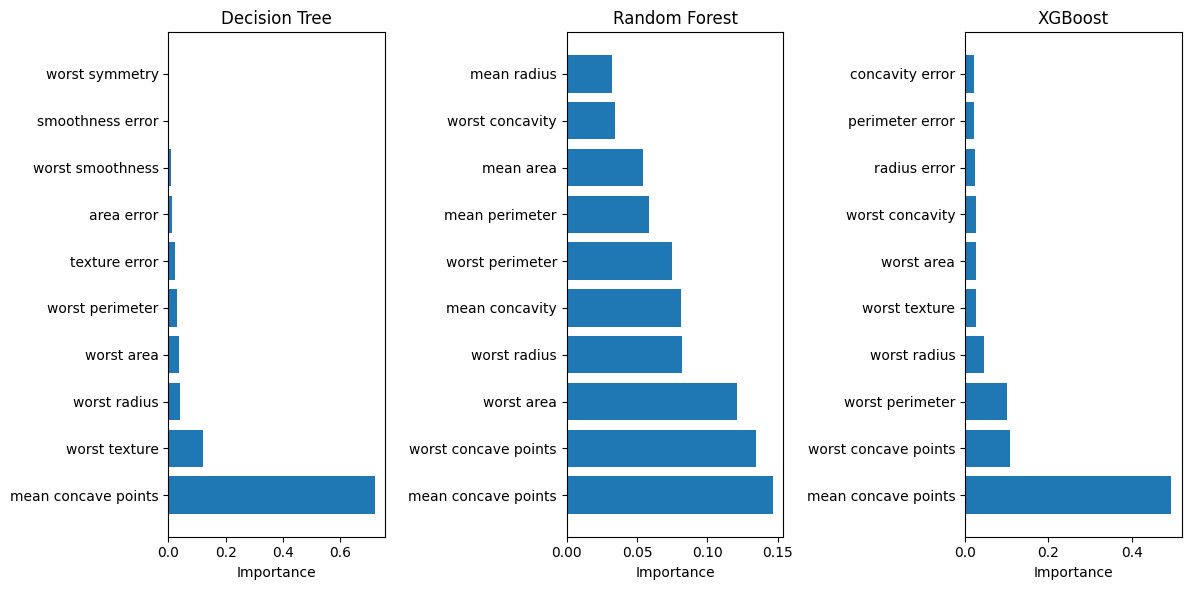

In [ ]:
# importance
dt_importance = dt_model.feature_importances_
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_
# knn_importance = knn_model.feature_importances_

# Sort
feature_names = data.feature_names
dt_sorted_idx = np.argsort(dt_importance)[::-1]
rf_sorted_idx = np.argsort(rf_importance)[::-1]
xgb_sorted_idx = np.argsort(xgb_importance)[::-1]
#Plot
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
plt.barh(range(10), dt_importance[dt_sorted_idx][:10], align='center')
plt.yticks(range(10), [feature_names[i] for i in dt_sorted_idx[:10]])
plt.xlabel("Importance")
plt.title("Decision Tree")

plt.subplot(1, 4, 2)
plt.barh(range(10), rf_importance[rf_sorted_idx][:10], align='center')
plt.yticks(range(10), [feature_names[i] for i in rf_sorted_idx[:10]])
plt.xlabel("Importance")
plt.title("Random Forest")

plt.subplot(1, 4, 3)
plt.barh(range(10), xgb_importance[xgb_sorted_idx][:10], align='center')
plt.yticks(range(10), [feature_names[i] for i in xgb_sorted_idx[:10]])
plt.xlabel("Importance")
plt.title("XGBoost")

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

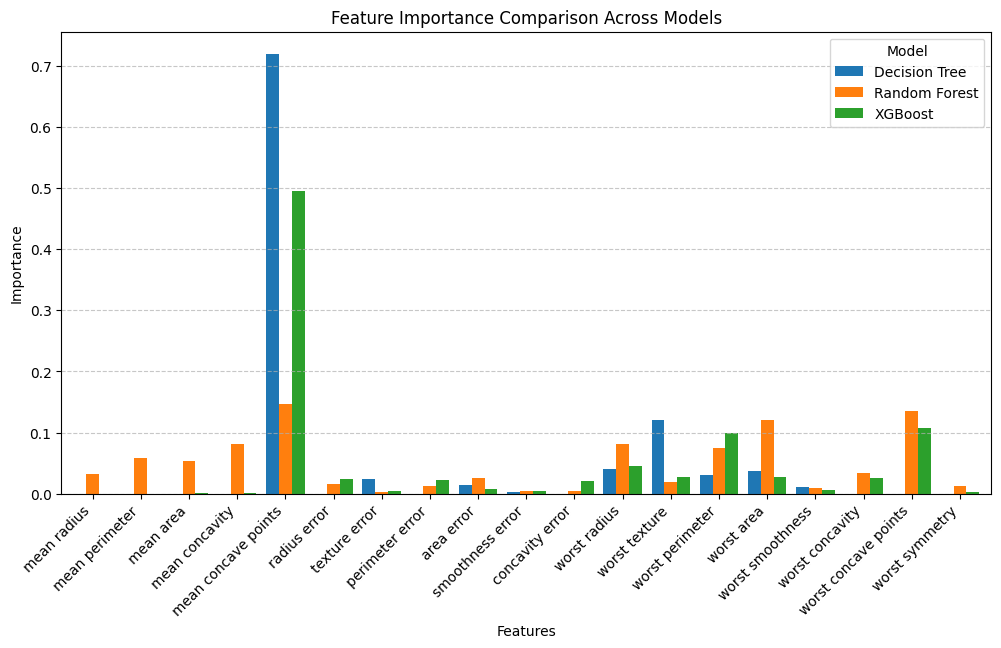

In [ ]:
# Feature names
feature_names = np.array(data.feature_names)  # Ensure correct feature names
feature_names
# Get top 10 feature indices for each model
dt_top10_idx = np.argsort(dt_importance)[::-1][:10]
rf_top10_idx = np.argsort(rf_importance)[::-1][:10]
xgb_top10_idx = np.argsort(xgb_importance)[::-1][:10]

# Get unique top 10 feature names (for unified comparison)
top_features_idx = np.unique(np.concatenate([dt_top10_idx, rf_top10_idx, xgb_top10_idx]))
top_features = feature_names[top_features_idx]

# Extract importances for only these top features
dt_top = dt_importance[top_features_idx]
rf_top = rf_importance[top_features_idx]
xgb_top = xgb_importance[top_features_idx]

# Create DataFrame
df_importances = pd.DataFrame({
    "Feature": top_features,
    "Decision Tree": dt_top,
    "Random Forest": rf_top,
    "XGBoost": xgb_top
}).set_index("Feature")

# Plot Feature Importances in One Figure
plt.figure(figsize=(12, 6))
df_importances.plot(kind="bar", width=0.8, figsize=(12, 6))

plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Comparison Across Models")
plt.xticks(rotation=45, ha="right")  # Make names readable
plt.legend(title="Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


# **Use feature importance to select the top 10 features and retrain the models. Does the performance improve or stay the same?**

In [ ]:
# Select the top 10 features
dt_top_10_idx = np.argsort(dt_importance)[::-1][:10]  # Indices of top 10 features
dt_top_10_features = [feature_names[i] for i in dt_top_10_idx]
print("Top 10 selected features:", dt_top_10_features)

rf_top_10_idx = np.argsort(rf_importance)[::-1][:10]  # Indices of top 10 features
rf_top_10_features = [feature_names[i] for i in rf_top_10_idx]
print("Top 10 selected features:", dt_top_10_features)

xgb_top_10_idx = np.argsort(xgb_importance)[::-1][:10]  # Indices of top 10 features
xgb_top_10_features = [feature_names[i] for i in xgb_top_10_idx]
print("Top 10 selected features:", xgb_top_10_features)

Top 10 selected features: ['mean concave points', 'worst texture', 'worst radius', 'worst area', 'worst perimeter', 'texture error', 'area error', 'worst smoothness', 'smoothness error', 'worst symmetry']
Top 10 selected features: ['mean concave points', 'worst texture', 'worst radius', 'worst area', 'worst perimeter', 'texture error', 'area error', 'worst smoothness', 'smoothness error', 'worst symmetry']
Top 10 selected features: ['mean concave points', 'worst concave points', 'worst perimeter', 'worst radius', 'worst texture', 'worst area', 'worst concavity', 'radius error', 'perimeter error', 'concavity error']


In [ ]:
def retrain_model(top_10_idx, X, y, model):
  # Reduce X to only top 10 features
  X_top10 = X[:, top_10_idx]
  # Split dataset with reduced features
  X_train_top10, X_test_top10, y_train, y_test = train_test_split(X_top10, y, test_size=0.3, random_state=42)
  model.fit(X_train_top10, y_train)
  evaluate_model(model, X_test_top10, y_test)

  # Return the train/test splits
  return X_train_top10, X_test_top10, y_train, y_test

In [ ]:
print("Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
X_train_top10_rf, X_test_top10_rf, y_train_rf, y_test_rf= retrain_model(rf_top_10_idx,X,y,rf_model)

print("Decision Tree:")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
X_train_top10_dt, X_test_top10_dt, y_train_dt, y_test_dt=retrain_model(dt_top_10_idx,X,y,dt_model)

print("XGBoost")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
X_train_top10_xgb, X_test_top10_xgb, y_train_xgb, y_test_xgb=retrain_model(xgb_top_10_idx,X,y,xgb_model)

Random Forest:
Accuracy: 0.96
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Decision Tree:
Accuracy: 0.95
ROC AUC: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

XGBoost
Accuracy: 0.95
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.95      0.96      0.96

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:42:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


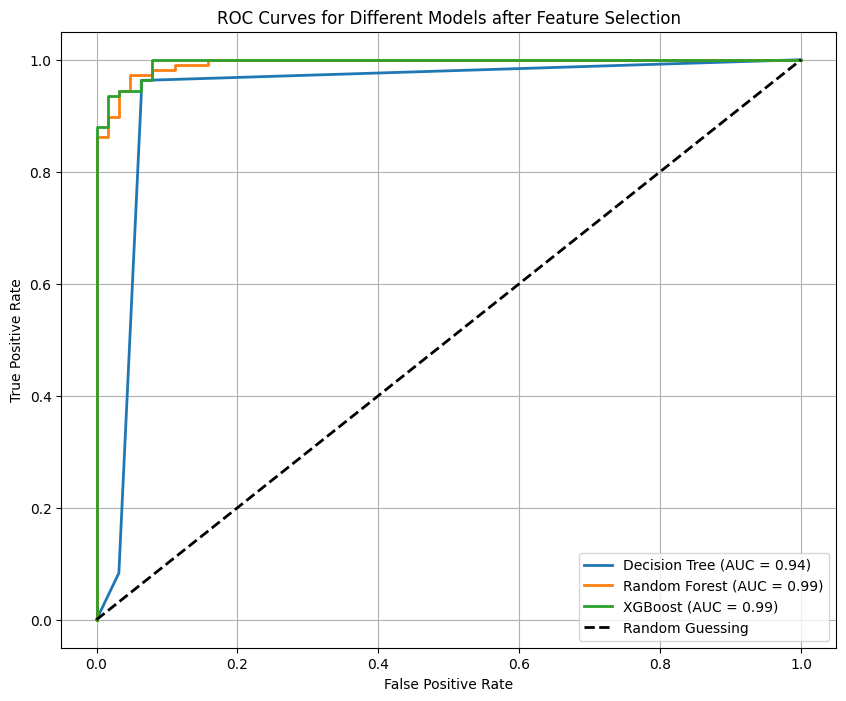

In [ ]:
# prompt: Plot Roc Curve of the three models after feature selection

models = [dt_model, rf_model, xgb_model]
model_names = ['Decision Tree', 'Random Forest', 'XGBoost']
plt.figure(figsize=(10, 8))

for i, model in enumerate(models):
    if model_names[i] == 'Decision Tree':
        y_pred_prob = model.predict_proba(X_test_top10_dt)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test_dt, y_pred_prob)
    elif model_names[i] == 'Random Forest':
        y_pred_prob = model.predict_proba(X_test_top10_rf)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_prob)
    elif model_names[i] == 'XGBoost':
        y_pred_prob = model.predict_proba(X_test_top10_xgb)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test_xgb, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models after Feature Selection')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
